In [1]:
"""
Russian handwritten letters 
https://www.kaggle.com/code/tatianasnwrt/deep-ru-letters-cnn-tutorial 
 - classify Russian handwrite letters
 - 33 classes 
 - 32 x 32 x 4 pictures
"""

'\nRussian handwritten letters \nhttps://www.kaggle.com/code/tatianasnwrt/deep-ru-letters-cnn-tutorial \n - classify Russian handwrite letters\n - 33 classes \n - 32 x 32 x 4 pictures\n'

In [1]:
import os 
import tensorflow as tf 
from tensorflow import keras 
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, BatchNormalization,Activation,Dropout,MaxPooling2D,Flatten,Dense

In [2]:
#open the file folder
files = os.listdir('/Users/Junyu Mou/Desktop/File/BU/4st-SPRING 2022/CS 767/lab&project/Dataset/all_letters_image/all_letters_image/')
len(files)

14190

In [3]:
#import dataset 
folder = '/Users/Junyu Mou/Desktop/File/BU/4st-SPRING 2022/CS 767/lab&project/Dataset/all_letters_image/all_letters_image/'
data = pd.read_csv("/Users/Junyu Mou/Desktop/File/BU/4st-SPRING 2022/CS 767/lab&project/Dataset/all_letters_info.csv")
names = data['file']

#convert picture to array 
tensor_list = [] 
for name in names: 
    tmp = keras.preprocessing.image.load_img(folder+name, target_size=(32,32))
    tmp = keras.preprocessing.image.img_to_array(tmp)
    tensor_list.append(tmp)

x = np.array(tensor_list)
y = data['label'].values

In [4]:
data.head(10)

,letter,label,file,background
0,а,1,01_01.png,0
1,а,1,01_02.png,0
2,а,1,01_03.png,0
3,а,1,01_04.png,0
4,а,1,01_05.png,0
5,а,1,01_06.png,0
6,а,1,01_07.png,0
7,а,1,01_08.png,0
8,а,1,01_09.png,0
9,а,1,01_10.png,0


In [5]:
#Max normalization 
x = x.astype('float')/255
y = y.reshape(14190,1)
y = keras.utils.to_categorical(y-1,num_classes=33, dtype="float32")

In [6]:
#display the data dimenstion
print("Training data shape - {}".format(x.shape))
print("Training data type - {}".format(x.dtype))

Training data shape - (14190, 32, 32, 3)
Training data type - float64


In [7]:
print("letters: ",np.unique(data['letter']))

letters:  ['а' 'б' 'в' 'г' 'д' 'е' 'ж' 'з' 'и' 'й' 'к' 'л' 'м' 'н' 'о' 'п' 'р' 'с'
 'т' 'у' 'ф' 'х' 'ц' 'ч' 'ш' 'щ' 'ъ' 'ы' 'ь' 'э' 'ю' 'я' 'ё']


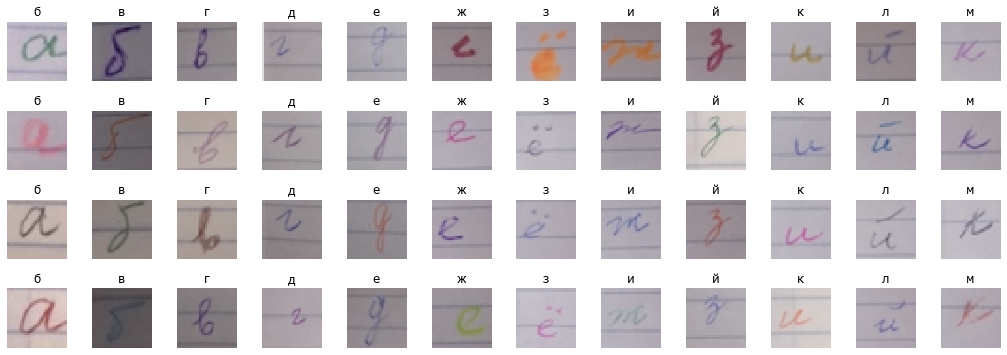

In [8]:
#display the data with label
letters = list(np.unique(data['letter']))
n_rows = 4
n_cols = 12
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        tar =  row  + col *50
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(x[tar], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(letters[data['label'][tar]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


<BarContainer object of 33 artists>

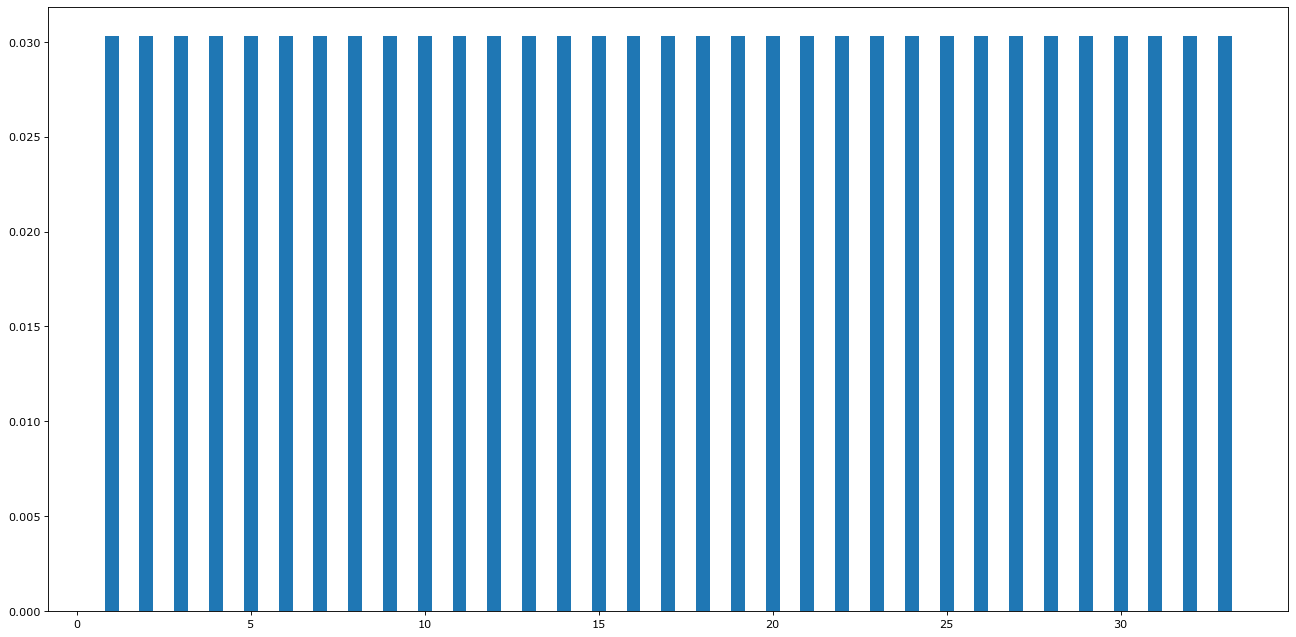

In [9]:
# data distribution 
hist = data['label'].groupby(data['label']).count()
plt.figure(figsize=(20, 10), dpi=80)
plt.bar(list(hist.index), hist/len(data), 0.4)

In [10]:
#background 
data['file'].groupby(data['background']).count()

background
0     726
1     924
2    5940
3    6600
Name: file, dtype: int64

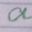

In [11]:
zero = Image.open('/Users/Junyu Mou/Desktop/File/BU/4st-SPRING 2022/CS 767/lab&project/Dataset/all_letters_image/all_letters_image/01_01.png')
zero #background = 0 

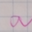

In [12]:
one = Image.open('/Users/Junyu Mou/Desktop/File/BU/4st-SPRING 2022/CS 767/lab&project/Dataset/all_letters_image/all_letters_image/01_23.png')
one #background = 1 

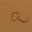

In [13]:
two = Image.open('/Users/Junyu Mou/Desktop/File/BU/4st-SPRING 2022/CS 767/lab&project/Dataset/all_letters_image/all_letters_image/01_152.png')
two #background = 2

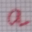

In [14]:
three = Image.open('/Users/Junyu Mou/Desktop/File/BU/4st-SPRING 2022/CS 767/lab&project/Dataset/all_letters_image/all_letters_image/01_231.png')
three #background = 3 

In [15]:
"""the dataset is perfectly balanced"""

'the dataset is perfectly balanced'

In [16]:
#split_data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20220411)

In [17]:
#build the CNN model:

In [18]:
#image augmentation 
image_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip(mode = "horizontal_and_vertical",
                                                 input_shape=[32,32,3]),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [19]:
#build model 
model = keras.Sequential() 
#model.add(image_augmentation)
model.add(Conv2D(16, 3, padding ='same', input_shape = (32, 32, 3), kernel_initializer= keras.initializers.HeNormal())) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, 3, padding ='same', kernel_initializer= keras.initializers.HeNormal()))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = 2, strides = None, padding = 'valid', data_format = None))
model.add(Conv2D(32, 3, padding ='same', kernel_initializer= keras.initializers.HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3, padding ='same', kernel_initializer= keras.initializers.HeNormal()))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = 2, strides = None, padding = 'valid', data_format = None))
model.add(Conv2D(64, 3, padding ='same', kernel_initializer= keras.initializers.HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, 3, padding ='same', kernel_initializer= keras.initializers.HeNormal()))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = 2, strides = None, padding = 'valid', data_format = None))
#fully connected layers
model.add(Flatten())
model.add(Dense(256, kernel_initializer= keras.initializers.HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128, kernel_initializer= keras.initializers.HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(33, activation='softmax'))
#set early stopping and callbacks 
my_callbacks = [
    tf.keras.callbacks.EarlyStopping( patience=10,restore_best_weights=True), 
    tf.keras.callbacks.ModelCheckpoint( "best_model.h5",save_best_only=True), #save best model 
]

In [20]:
#exponental scheduling 
def exponential_decay_fn(epoch):
    return 0.01*0.1**(epoch/20)
ex_decay = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

#performance scheduling 
per_sche = keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)

In [21]:
keras.backend.clear_session()
tf.random.set_seed(111)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 
history = model.fit(x_train,y_train, epochs=100, validation_split=0.1,callbacks=[my_callbacks,ex_decay])

Epoch 1/100
280/280 [==============================] - 3s 11ms/step - loss: 3.5869 - accuracy: 0.0594 - val_loss: 3.5307 - val_accuracy: 0.0342
Epoch 2/100
280/280 [==============================] - 2s 9ms/step - loss: 3.2775 - accuracy: 0.0987 - val_loss: 3.2559 - val_accuracy: 0.1167
Epoch 3/100
280/280 [==============================] - 2s 9ms/step - loss: 3.0577 - accuracy: 0.1399 - val_loss: 3.3614 - val_accuracy: 0.0976
Epoch 4/100
280/280 [==============================] - 2s 9ms/step - loss: 2.8616 - accuracy: 0.1844 - val_loss: 2.9839 - val_accuracy: 0.1670
Epoch 5/100
280/280 [==============================] - 2s 9ms/step - loss: 2.6576 - accuracy: 0.2416 - val_loss: 3.1514 - val_accuracy: 0.1489
Epoch 6/100
280/280 [==============================] - 3s 10ms/step - loss: 2.4825 - accuracy: 0.2927 - val_loss: 2.6129 - val_accuracy: 0.2887
Epoch 7/100
280/280 [==============================] - 2s 9ms/step - loss: 2.3360 - accuracy: 0.3317 - val_loss: 2.5020 - val_accuracy: 0.33

In [22]:
model.evaluate(x_test,y_test)

134/134 [==============================] - 0s 3ms/step - loss: 1.7976 - accuracy: 0.5426


[1.7976007461547852, 0.5426356792449951]

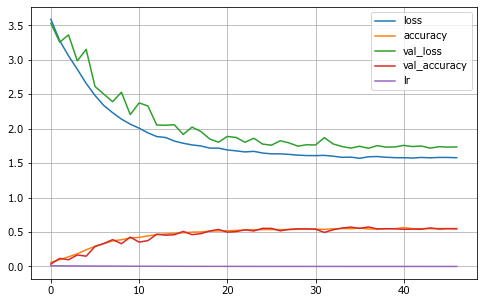

In [23]:
#plot leaning curve 
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.show()